In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
#creating the dataset
import numpy as np # conda install numpy -y
import pandas as pd # conda install pandas -y
import matplotlib.pyplot as plt # conda install matplotlib -y
from skimage.io import imread # conda install scikit-image -y
import os
import csv


In [0]:
def dataset1(path,label,outputFileName):
    #function to create the first part of the dataset
    #it returns as output a csv file with the name of the image,label
    i=0
    imgArray = []#array were we will store all our images
    for root, dirs, files in os.walk(path):
        if(i != 0):#here is where we change directory
            print("CHANGED")
        prev_dir = root
        
        for file_ in files:

            img = os.path.join(root, file_)
            with open ('C:/Users/aecan/image_Mining/testImages-20200314T175026Z-001/'+outputFileName, 'a',newline = '') as file:
                writer = csv.writer(file)
                #print(path,file_)
                #print(os.path.join(path, file_))
               # print(file
                print(root+file_)
                writer.writerow([os.path.join(root, file_),label[i-1]])
                ##change to  writer.writerow([os.path.join(root, file_),label[i-1]]) if you want just the name of the file
            
        
           # print( os.path.join(root, file_),i )
        i+=1
    return #this is the X inX_train our dataset

In [0]:
#dataset1("C:/Users/aecan/image_Mining/testImages-20200314T175026Z-001/smallData",label,"s4.csv")
#df = pd.read_csv('C:/Users/aecan/image_Mining/testImages-20200314T175026Z-001/s4.csv',names=["File","Food"])

In [0]:
import cv2
import PIL
import os
def resize_images(df):
    #THIS FUNCTION RESIZES OUR IMAGES TO 150 * 150 PIXELS
    for i in range(0,len(df)):
      
      filename= os.path.basename(df.loc[i].File)
      if not(os.path.isfile("drive/My Drive/Colab Notebooks/resizedIms/"+filename)):
        print("ENTERING")
        image = PIL.Image.open(df.loc[i].File)
        new_image = image.resize((150, 150))
        #new_image.show()
        print(image.filename)
        filename= os.path.basename(df.loc[i].File)
        #direct = "drive/My Drive/Colab Notebooks/whole_food_datasetColab.csv/resizedIms"+image.name+'.jpg'
        new_image.save("drive/My Drive/Colab Notebooks/resizedIms/"+filename)
        #cv2.imwrite(direct, new_image) 
        
    return

In [39]:
#resize_images(df2)
df_whole = pd.read_csv("drive/My Drive/Colab Notebooks/whole_food_datasetColab.csv")
df_whole

,File,Food,Serving,Calories,Total Fat,Cholesterol,Sodium,Protein
0,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
1,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
2,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
3,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
4,drive/My Drive/Colab Notebooks/images/apple_pi...,Apple Pie,125g,296,14g,0,251mg,2.4g
...,...,...,...,...,...,...,...,...
99995,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g
99996,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g
99997,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g
99998,drive/My Drive/Colab Notebooks/images/waffles/...,Waffles,75g,218,11g,52mg,383mg,5.9g


In [4]:
#classification using histogram as a feature
from skimage import exposure, img_as_float # for histogram
df_partial = pd.read_csv("drive/My Drive/Colab Notebooks/partial_dataset_GC.csv",sep = ";")
df_partial

,File,Food,Serving,Calories,Total Fat,Cholesterol,Sodium,Protein
0,drive/My Drive/Colab Notebooks/resizedIms/1005...,Apple Pie,125g,296,14g,0,251mg,2.4g
1,drive/My Drive/Colab Notebooks/resizedIms/1011...,Apple Pie,125g,296,14g,0,251mg,2.4g
2,drive/My Drive/Colab Notebooks/resizedIms/1012...,Apple Pie,125g,296,14g,0,251mg,2.4g
3,drive/My Drive/Colab Notebooks/resizedIms/1014...,Apple Pie,125g,296,14g,0,251mg,2.4g
4,drive/My Drive/Colab Notebooks/resizedIms/1026...,Apple Pie,125g,296,14g,0,251mg,2.4g
...,...,...,...,...,...,...,...,...
5995,drive/My Drive/Colab Notebooks/resizedIms/9666...,Beet salad,259g,598,52g,18mg,577mg,11g
5996,drive/My Drive/Colab Notebooks/resizedIms/9791...,Beet salad,259g,598,52g,18mg,577mg,11g
5997,drive/My Drive/Colab Notebooks/resizedIms/9862...,Beet salad,259g,598,52g,18mg,577mg,11g
5998,drive/My Drive/Colab Notebooks/resizedIms/9864...,Beet salad,259g,598,52g,18mg,577mg,11g


In [0]:
#comment this if we have already done it
features = []
for filename in df_partial.File:
    im = imread(filename)
    im = img_as_float(im)
   
    features.append( np.array(imread(filename)))

features = np.array(features)

Using a CNN to classify images

In [0]:
df_partial

,File,Food,Serving,Calories,Total Fat,Cholesterol,Sodium,Protein
0,drive/My Drive/Colab Notebooks/resizedIms/1005...,Apple Pie,125g,296,14g,0,251mg,2.4g
1,drive/My Drive/Colab Notebooks/resizedIms/1011...,Apple Pie,125g,296,14g,0,251mg,2.4g
2,drive/My Drive/Colab Notebooks/resizedIms/1012...,Apple Pie,125g,296,14g,0,251mg,2.4g
3,drive/My Drive/Colab Notebooks/resizedIms/1014...,Apple Pie,125g,296,14g,0,251mg,2.4g
4,drive/My Drive/Colab Notebooks/resizedIms/1026...,Apple Pie,125g,296,14g,0,251mg,2.4g
...,...,...,...,...,...,...,...,...
5995,drive/My Drive/Colab Notebooks/resizedIms/9666...,Beet salad,259g,598,52g,18mg,577mg,11g
5996,drive/My Drive/Colab Notebooks/resizedIms/9791...,Beet salad,259g,598,52g,18mg,577mg,11g
5997,drive/My Drive/Colab Notebooks/resizedIms/9862...,Beet salad,259g,598,52g,18mg,577mg,11g
5998,drive/My Drive/Colab Notebooks/resizedIms/9864...,Beet salad,259g,598,52g,18mg,577mg,11g


In [0]:
'''
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_partial['Food']= label_encoder.fit_transform(df_partial['Food']) 
  
y_unique = df_partial['Food'].unique() 
y = df_partial['Food']

In [0]:
import pickle
#we unpickle the features
pickle_off = open("drive/My Drive/Colab Notebooks/features_pixels_partial.pickle","rb")
features = pickle.load(pickle_off)

In [13]:
seed = 23
from sklearn.model_selection import train_test_split
# Split dataset

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_partial['Food']= label_encoder.fit_transform(df_partial['Food']) 
  
y_unique = df_partial['Food'].unique() 
y = df_partial['Food']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape)) 

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape))

Training set shape: (4800, 150, 150, 3)
Test set shape: (1200, 150, 150, 3)


Using TensorFlow backend.


Training set shape: (4800, 150, 150, 3)
Test set shape: (1200, 150, 150, 3)


In [0]:
#and now we build a model
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a Dense Layer
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
   
    tf.keras.layers.Dense(6, activation='sigmoid')
])

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, y_train_one_hot, 
batch_size=1, epochs=10, validation_split=0.3 )

Epoch 1/10
3360/3360 [==============================] - 22s 7ms/step - loss: 8.6663 - accuracy: 0.1649 - val_loss: 8.4937 - val_accuracy: 0.1597
Epoch 2/10
3360/3360 [==============================] - 23s 7ms/step - loss: 8.6661 - accuracy: 0.1649 - val_loss: 8.4937 - val_accuracy: 0.1597
Epoch 3/10
3360/3360 [==============================] - 22s 7ms/step - loss: 8.6661 - accuracy: 0.1649 - val_loss: 8.4937 - val_accuracy: 0.1597
Epoch 4/10
3360/3360 [==============================] - 22s 7ms/step - loss: 8.6661 - accuracy: 0.1649 - val_loss: 8.4937 - val_accuracy: 0.1597
Epoch 5/10
3360/3360 [==============================] - 23s 7ms/step - loss: 8.6661 - accuracy: 0.1649 - val_loss: 8.4937 - val_accuracy: 0.1597
Epoch 6/10
3360/3360 [==============================] - 23s 7ms/step - loss: 8.6661 - accuracy: 0.1649 - val_loss: 8.4937 - val_accuracy: 0.1597
Epoch 7/10
3360/3360 [==============================] - 22s 7ms/step - loss: 8.6661 - accuracy: 0.1649 - val_loss: 8.4937 - val_ac

In [28]:
#same model, more epochs
hist = model.fit(X_train, y_train_one_hot, 
batch_size=1, epochs=40, validation_split=0.3 )

Epoch 1/40
336/336 [==============================] - 5s 14ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597
Epoch 2/40
336/336 [==============================] - 5s 13ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597
Epoch 3/40
336/336 [==============================] - 4s 13ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597
Epoch 4/40
336/336 [==============================] - 4s 13ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597
Epoch 5/40
336/336 [==============================] - 5s 14ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597
Epoch 6/40
336/336 [==============================] - 5s 14ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597
Epoch 7/40
336/336 [==============================] - 5s 14ms/step - loss: 8.6665 - accuracy: 0.1649 - val_loss: 8.4936 - val_accuracy: 0.1597

In [21]:
model.evaluate(X_test, y_test_one_hot)[1]

38/38 [==============================] - 1s 16ms/step - loss: 8.5960 - accuracy: 0.1800


0.18000000715255737

In [24]:

X_train1 = X_train.reshape(-1, 150,150, 1)
X_test1 = X_test.reshape(-1, 150,150, 1)
X_train1 = X_train.astype('float32')
X_test1 = X_test.astype('float32')
X_train1 = X_train1/255
X_test1 = X_test1/255
print('Training set shape: {}'.format(X_train1.shape))
print('Test set shape: {}'.format(X_test1.shape))

Training set shape: (4800, 150, 150, 3)
Test set shape: (1200, 150, 150, 3)


In [0]:
##Classification using a CNN

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model2 = Sequential()
model2.add(Conv2D(3200, (2, 2), activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(5, 5)))

model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
#model.add(Dense(256, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
hist = model2.fit(X_train1, y_train_one_hot, 
batch_size=10, epochs=10, validation_split=0.3 )

Train on 3360 samples, validate on 1440 samples
Epoch 1/10
3360/3360 [==============================] - 182s 54ms/step - loss: 1.7918 - accuracy: 0.1696 - val_loss: 1.7918 - val_accuracy: 0.1708
Epoch 2/10
3360/3360 [==============================] - 180s 53ms/step - loss: 1.7918 - accuracy: 0.1696 - val_loss: 1.7919 - val_accuracy: 0.1708
Epoch 3/10
3360/3360 [==============================] - 179s 53ms/step - loss: 1.7918 - accuracy: 0.1696 - val_loss: 1.7919 - val_accuracy: 0.1708
Epoch 4/10
3360/3360 [==============================] - 179s 53ms/step - loss: 1.7918 - accuracy: 0.1696 - val_loss: 1.7920 - val_accuracy: 0.1708
Epoch 5/10
3360/3360 [==============================] - 179s 53ms/step - loss: 1.7918 - accuracy: 0.1696 - val_loss: 1.7920 - val_accuracy: 0.1708
Epoch 6/10
3360/3360 [==============================] - 179s 53ms/step - loss: 1.7918 - accuracy: 0.1670 - val_loss: 1.7921 - val_accuracy: 0.1708
Epoch 7/10
3360/3360 [==============================] - 180s 54ms/step

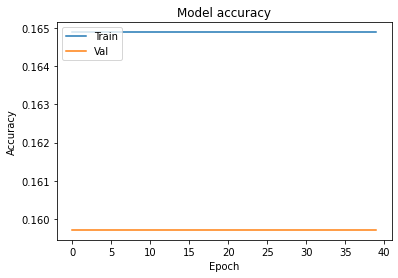

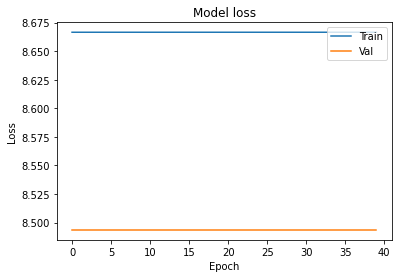

In [29]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
'''
hist = model2.fit(X_train1, y_train_one_hot, 
batch_size=10, epochs=40, validation_split=0.3 )

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#simpler model
model3 = Sequential()
model3.add(Conv2D(64, (2, 2), activation='relu', input_shape=(150,150,3)))
model3.add(MaxPooling2D(pool_size=(5, 5)))

#model2.add(Conv2D(64, (5, 5), activation='relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
#model.add(Dense(256, activation='relu'))
model3.add(Dense(6, activation='softmax'))


In [0]:
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
hist3 = model2.fit(X_train, y_train_one_hot, 
batch_size=10, epochs=10, validation_split=0.3 )

Train on 3360 samples, validate on 1440 samples
Epoch 1/10
3360/3360 [==============================] - 181s 54ms/step - loss: 2.9228 - accuracy: 0.1634 - val_loss: 1.7921 - val_accuracy: 0.1639
Epoch 2/10
3360/3360 [==============================] - 181s 54ms/step - loss: 1.7944 - accuracy: 0.1628 - val_loss: 1.7923 - val_accuracy: 0.1639
Epoch 3/10
3360/3360 [==============================] - 180s 54ms/step - loss: 1.7919 - accuracy: 0.1664 - val_loss: 1.7922 - val_accuracy: 0.1708
Epoch 4/10
3360/3360 [==============================] - 180s 54ms/step - loss: 1.7918 - accuracy: 0.1664 - val_loss: 1.7922 - val_accuracy: 0.1639
Epoch 5/10
3360/3360 [==============================] - 180s 54ms/step - loss: 1.7919 - accuracy: 0.1658 - val_loss: 1.7923 - val_accuracy: 0.1632
Epoch 6/10
3360/3360 [==============================] - 180s 54ms/step - loss: 1.7919 - accuracy: 0.1607 - val_loss: 1.7922 - val_accuracy: 0.1604
Epoch 7/10
3360/3360 [==============================] - 180s 54ms/step

In [35]:
model3.evaluate(X_test, y_test_one_hot)[1]

1200/1200 [==============================] - 1s 752us/step


0.18416666984558105

In [0]:
'''
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 
convnet = input_data(shape =[None, 150, 150, 1], name ='input') 
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 2, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log') 

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
num_classes = 6
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(150,150,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
fashion_model.summary()
hist = fashion_model.fit(X_train1, y_train_one_hot, 
batch_size=1, epochs=10, validation_split=0.3)

In [21]:
fashion_model.evaluate(X_test, y_test_one_hot)[1]

1200/1200 [==============================] - 1s 556us/step


0.15333333611488342

In [0]:
#some reshaping
X_train = X_train.reshape(-1, 150,150, 1)
X_test = X_test.reshape(-1, 150,150, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [0]:
from sklearn.model_selection import train_test_split
#train_X,valid_X,train_label,valid_label = train_test_split(features, y, test_size=0.2, random_state=13)
fashion_train = fashion_model.fit(X_train, train_Y_one_hot, batch_size=2,epochs=20,verbose=1,validation_data=(X_test, test_Y_one_hot))

In [134]:


# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [1. 0. 0. 0. 0. 0.]


In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 38, 38, 128)      

NameError: ignored

In [30]:
df_partial.loc[5999]


File           drive/My Drive/Colab Notebooks/resizedIms/9868...
Food                                                           5
Serving                                                     259g
Calories                                                     598
Total Fat                                                    52g
Cholesterol                                                 18mg
Sodium                                                     577mg
Protein                                                      11g
Name: 5999, dtype: object

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0.]


ValueError: ignored

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [161]:
fashion_model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 150, 150, 32)      320       
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 75, 75, 64)        18496     
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 38, 38, 128)     

ValueError: ignored

(4800, 6)

In [142]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.48823452875092627
Test accuracy: 0.9168000221252441


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

AttributeError: ignored